# 1. Linear Regression

### En este notebook trabajaremos con una base de datos del clima en Barajas,Madrid, con 82210 muestras tomadas en 1826 dias durante el periodo de 1991 a 1995.

In [1]:
#imports
import numpy as np
import pandas as pd
#para graficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # para graficos 3d
%matplotlib inline


In [2]:
# Carga el archivo Excel en un DataFrame de pandas
data = pd.read_excel('/Users/rod/Desktop/materias/machineLearning/cursoML_ene-jun2024/02-Machine-Learning/notebooks/data/82210-1.xlsx')

# Muestra los tipos de datos de cada columna
print("\nTipos de datos de cada columna:")
print(data.dtypes)

# Muestra las dimensiones del DataFrame
print("\nDimensiones del DataFrame (filas, columnas):")
print(data.shape)



Tipos de datos de cada columna:
Y        int64
M        int64
D        int64
T      float64
TM     float64
Tm     float64
SLP     object
STP     object
H       object
PP      object
VV     float64
V      float64
VM      object
VG      object
FG       int64
RA       int64
SN       int64
GR       int64
TS       int64
TR       int64
dtype: object

Dimensiones del DataFrame (filas, columnas):
(1826, 20)


### Haremos regresion lineal multivariada usando como variables independientes la Temperatura Promedio (T), y Temperatura Máxima (TM) para predecir la Temperatura Mínima (Tm) que será la variable dependiente


In [3]:

# Indices de las columnas a seleccionar (T y TM)
categories = [3, 4]

# Selecciona las columnas relevantes para X
X = data.iloc[:, categories]

# Selecciona la columna 'Tm' como y
y = data['Tm']

# Número de ejemplos de entrenamiento
m = y.size 

# Reshape y a una matriz mx1
y = y.values.reshape((m, 1))

In [4]:
# Verificar si hay NaN en X y en y
nan_in_X = np.isnan(X).any()
nan_in_y = np.isnan(y).any()
print (nan_in_y)
print (nan_in_X)

False
T     False
TM    False
dtype: bool


In [5]:
# Imprimir las primeras filas de X
print("Matriz X:")
print(X.head())

Matriz X:
     T    TM
0  5.3   9.6
1  2.6   6.4
2  2.3   5.2
3  3.9  10.0
4  2.9  10.4


### Normalizamos los datos de la matriz

In [6]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    X_norm = X_norm - mu
    X_norm = X_norm / sigma

    return X_norm, mu, sigma

In [7]:
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: T     14.446057
TM    21.146331
dtype: float64
Computed standard deviation: T     7.825157
TM    8.862171
dtype: float64


### añadimos columna de unos a X

In [8]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis = 1)

In [9]:
def computeCostMulti(X, y, theta):

    m = y.shape[0] 
    J = 0.0
    J = 1./(2. * m) * np.sum((np.dot(X, theta) - y)**2)

    return J

### Gradient Descent Multiple

In [10]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    

    m = y.shape[0] 
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha/m) * np.dot(X.T, (np.dot(X, theta) - y))

        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

### Variamos la tasa de aprendizaje y el número de iteraciones tal que notemos convergencia de la función de costo. 

theta computed from gradient descent: [[ 7.77568235]
 [ 7.12508179]
 [-0.91218916]]


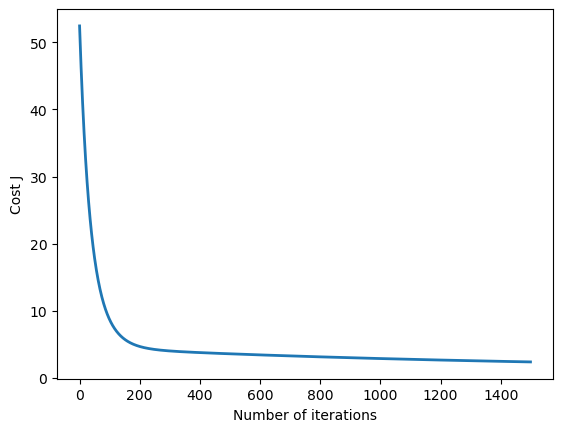

In [11]:
alpha = 0.01
num_iters = 1500

theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

J_history = np.nan_to_num(J_history)

plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [12]:
#quitar warnings 
import warnings
# Filtrar las advertencias FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

### Análisis del modelo 

In [13]:
price = np.dot([1.0 , (6.2 - mu[0])/sigma[0], (10 - mu[1]) / sigma[1]], theta)
print('####  RESULTADOS  ####')
print(f'Predicción de temperatura mínima en un día con temperatura promedio de 6.2 grados y temperatura máxima de 10 grados (usando gradient descent): {price[0]} \n')

####  RESULTADOS  ####
Predicción de temperatura mínima en un día con temperatura promedio de 6.2 grados y temperatura máxima de 10 grados (usando gradient descent): 1.4146558437140324 



### conclusiones
#### Podemos ver que el modelo hace un trabajo decente prediciendo una temperatura mínima de 1.41 grados cuando la real es de 3.41 grados